# 프로젝트 목적   

## Airbnb(New york) 데이터로 최적의 price를 찾는 머신러닝에서 MSE Score를 51만점 이하로 낮춰보자 

# 1. Baseline

In [71]:
# 라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [72]:
# 데이터 불러오기
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')

# 2. EDA (탐색적 데이터 분석)

In [73]:
# 데이터 크기
train.shape, test.shape

((39116, 16), (9779, 15))

In [74]:
# 데이터 샘플
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [75]:
# 결측치(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [76]:
# 데이터 타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [77]:
# 결측치(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

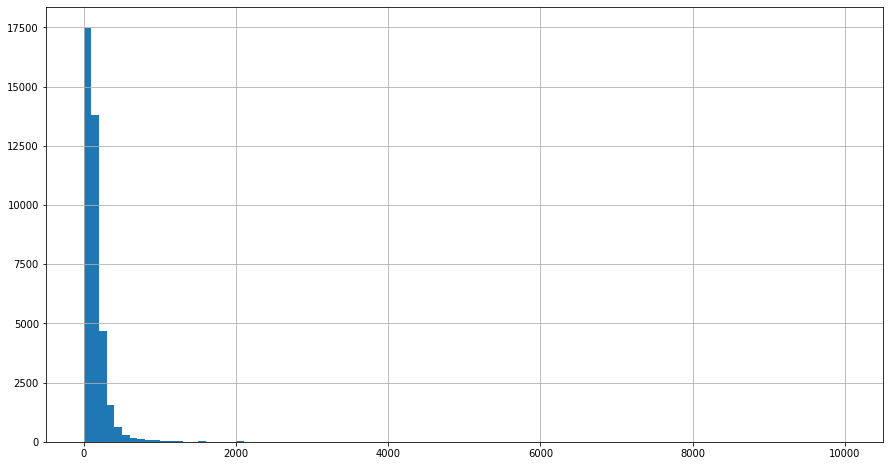

In [78]:
# target(hist)
train['price'].hist(bins=100, figsize=(15,8))

#### <span style='color: green'> 히스토그램을 통해 숙박비의 대략적인 분포를 알 수 있다.  </span> 

In [79]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

 ####  <span style='color:green'> price는 수치형 데이터이기 때문에 describe를 통해 기술 통계 정보를 확인한다. </span>
 #### <span style='color:green'> 숙박비의 평균은 152USD 이며 분산은 241로, 숙박비는 최솟값 0에서 최댓값 10000 사이에 분포한다. </span>  

In [80]:
# 상관계수
df = train.corr()
df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.591261,-0.002445,0.092199,0.009364,-0.011869,-0.319121,0.292461,0.132020,0.085416
host_id,0.591261,1.000000,0.020077,0.129314,0.013407,-0.016550,-0.141992,0.295881,0.152545,0.201772
latitude,-0.002445,0.020077,1.000000,0.082819,0.034243,0.026376,-0.010896,-0.004768,0.020802,-0.006414
longitude,0.092199,0.129314,0.082819,1.000000,-0.149165,-0.061787,0.059188,0.143867,-0.114195,0.087417
price,0.009364,0.013407,0.034243,-0.149165,1.000000,0.037318,-0.047780,-0.032975,0.056301,0.083983
minimum_nights,-0.011869,-0.016550,0.026376,-0.061787,0.037318,1.000000,-0.078471,-0.115527,0.130441,0.141984
number_of_reviews,-0.319121,-0.141992,-0.010896,0.059188,-0.047780,-0.078471,1.000000,0.547786,-0.072237,0.172597
reviews_per_month,0.292461,0.295881,-0.004768,0.143867,-0.032975,-0.115527,0.547786,1.000000,-0.011055,0.184217
calculated_host_listings_count,0.132020,0.152545,0.020802,-0.114195,0.056301,0.130441,-0.072237,-0.011055,1.000000,0.225041
availability_365,0.085416,0.201772,-0.006414,0.087417,0.083983,0.141984,0.172597,0.184217,0.225041,1.000000


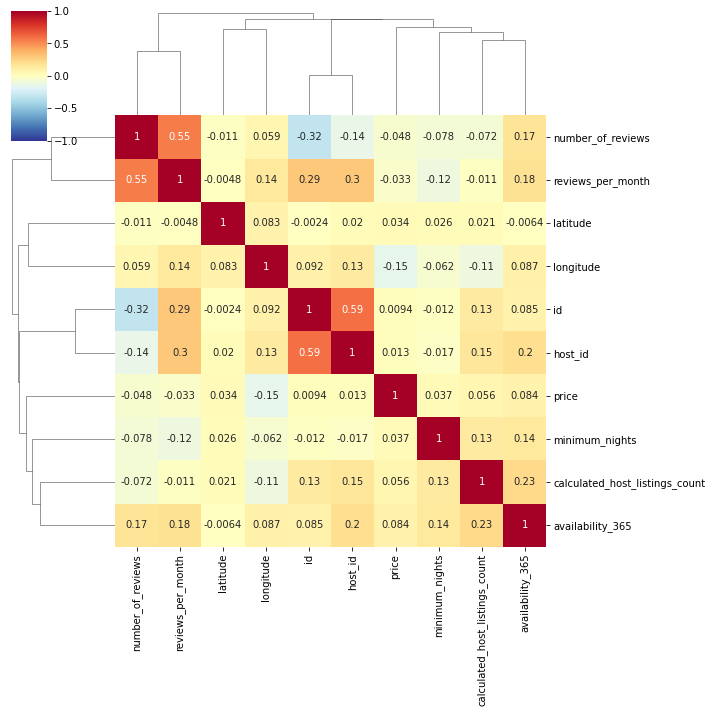

In [81]:
# heatmap으로 상관관계 파악 
sns.clustermap(df, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1)

#### <span style='color:green'> 전반적으로 price와 상관 관계가 높게 나타나지는 않지만, 그나마 availability 365와 calculated host listings count가 가장 상관관계가 높음을 알 수 있다.  </span>

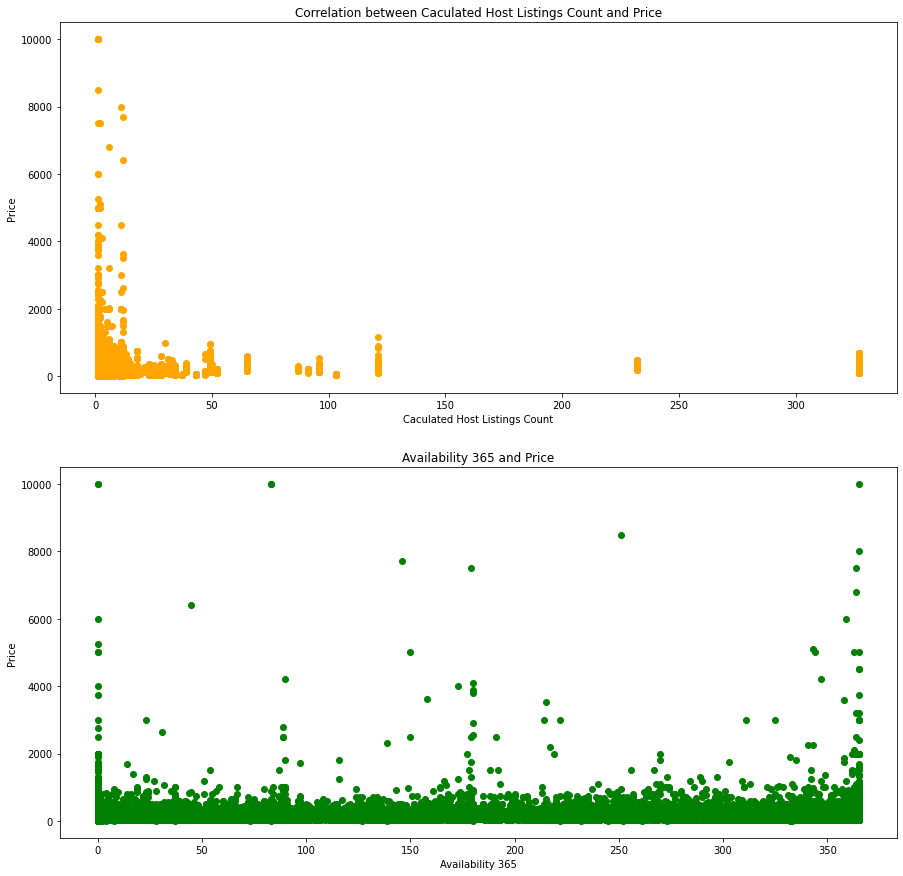

In [82]:
# 가격과 그나마 상관관계가 있는 'calculated_host_listings_count', 'availability_365'과 price 간의 산포도 그래프 

fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (15, 15))

ax[0].scatter(train['calculated_host_listings_count'], train['price'], label = "data", color='orange')
ax[0].set_title('Correlation between Caculated Host Listings Count and Price')
ax[0].set_xlabel('Caculated Host Listings Count')
ax[0].set_ylabel('Price')
              
              
ax[1].scatter(train['availability_365'], train['price'], label = "data", color='green')
ax[1].set_title('Availability 365 and Price')
ax[1].set_xlabel('Availability 365')
ax[1].set_ylabel('Price')

plt.show()



####  <span style='color:green'> 전반적으로 Caculated Host Listings Count가 낮을수록 숙박비가 비싸다. 반면 Availability 365는 딱 숙박비와 비례하지는 않지만, </span>   
#### <span style='color:green'>그래도 Availability 365가 높은 집의 숙박비가 비쌈을 확인할 수 있다. </span>

In [83]:
# 피처(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

#### <span style='color:green'> 한 호스트가 많게는 256개의 집이나 방을 대여한다. 그러나 숙박비와 관계가 있지는 않은 것 같다. </span>

# 3. 데이터 전처리
데이터를 살펴보고 판단하여 결측치 및 이상치를 처리

#### <span style='background-color: #fff5b1'> 회고 : price 값의 범위를 상, 중, 하로 나눠 원핫인코딩을 해봤는데, test에는 price가 없어서 결국 시간만 많이 쓰고 다 지워버렸다. 머신 러닝을 돌릴 때 다른 컬럼들은 바꾸고 조정해도 되지만 타겟인 price는 건들지 않는게 좋다는건 배웠다. </span> 

In [84]:
# 결측치 확인
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [85]:
# 결측치 컬럼 삭제 (last_review)
train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [86]:
# 결측치 채우기
train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [87]:
# 남은 결측치 0으로 채우기 
train = train.fillna(0)
test = test.fillna(0)

In [88]:
# 결측치 확인
train.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [89]:
# 가격 값 복사
target = train['price']
train = train.drop('price', axis=1)

In [90]:
# 수치형 피처 선택
cols = [
        'host_id',
        'latitude', 
        'longitude', 
        'minimum_nights',
        'number_of_reviews', 
        'reviews_per_month',
        'calculated_host_listings_count',
        'availability_365'    
        ]

train = train[cols]
test = test[cols]

#### <span style='background-color: #fff5b1'> 회고 : 수치형 피처에 'calculated_host_listings_count', 'availability_365' 만 남기니 오히려 59000이 넘어 다시 바꿔주었다. </span> 

# 4. 검증 데이터 분리
Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측

In [91]:
# 검증 데이터 분리 test size=0.2, random state 2022 > (0.1, 1000) 6 > (0.2, 1000) 5.8만 > (0.25, 1000) 5.8만 > (0.2, 500) 3.5만 
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.25, random_state=500)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((29337, 8), (9779, 8), (29337,), (9779,))

# 5. 머신러닝

In [92]:
# 머신러닝(선형 회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train) # x_train에 있는 값을 보고 y_train 맞추기
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

35507.76730599458

In [93]:
# 릿지 회귀
from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.05827e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


35507.22730755523

In [94]:
# 회귀 계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
host_id,2.431389e-08
latitude,1.991676e+02
longitude,-8.083775e+02
minimum_nights,8.574863e-02
number_of_reviews,-2.279354e-01
reviews_per_month,-3.861085e+00
calculated_host_listings_count,5.263933e-02
availability_365,2.020718e-01


In [95]:
# 릿지 회귀 (alpha=10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.54113e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


35530.50474860543

In [96]:
# 회귀 계수 (alpha 10)
coef['alpha10'] = model.coef_
coef

,alpha1,alpha10
host_id,2.431389e-08,1.799763e-08
latitude,1.991676e+02,1.735712e+02
longitude,-8.083775e+02,-7.013821e+02
minimum_nights,8.574863e-02,9.807015e-02
number_of_reviews,-2.279354e-01,-2.272047e-01
reviews_per_month,-3.861085e+00,-4.136095e+00
calculated_host_listings_count,5.263933e-02,7.487678e-02
availability_365,2.020718e-01,1.982148e-01


In [97]:
# 릿지 회귀 (alpha=0.05)
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.0074e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


35507.72001533766

In [98]:
# 회귀 계수 (alpha 0.05)
coef['alpha0.05'] = model.coef_
coef

,alpha1,alpha10,alpha0.05
host_id,2.431389e-08,1.799763e-08,2.509489e-08
latitude,1.991676e+02,1.735712e+02,2.023216e+02
longitude,-8.083775e+02,-7.013821e+02,-8.216062e+02
minimum_nights,8.574863e-02,9.807015e-02,8.422592e-02
number_of_reviews,-2.279354e-01,-2.272047e-01,-2.280262e-01
reviews_per_month,-3.861085e+00,-4.136095e+00,-3.827067e+00
calculated_host_listings_count,5.263933e-02,7.487678e-02,4.989028e-02
availability_365,2.020718e-01,1.982148e-01,2.025485e-01


#### <span style='background-color: #fff5b1'>회고: 회귀계수를 바꿔봐도 값이 크게 바뀌지는 않아서 하이퍼파라미터 튜닝을 해야겠다고 생각했다. </span>

In [99]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

36097.76939111903

In [100]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

36883.23765337072

In [101]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=2022)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

34996.538858145

In [103]:
# Xgboost
from xgboost import XGBRegressor
model = XGBRegressor(random_state=2022)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

37824.58526183416

#### <span style='background-color: #fff5b1'>회고 : random_state 값을 바꿔보았는데 값의 차이가 없어서 되돌렸다. </span>

In [104]:
# 하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV

# 하이퍼파라미터
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

#  Randomized Search
model = XGBRegressor()
grid = RandomizedSearchCV(model, params, cv=3, n_iter=10, n_jobs=-1) # n_iter 돌리는 횟수, n_jobs 코어 최대한 씀 
grid.fit(X_train, y_train)

# 최적의 하이퍼파라미터를 찾음
grid.best_params_

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


{'subsample': 0.7, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}

In [105]:
# 최적의 하이퍼파라미터 적용 
model = XGBRegressor(random_state=2022, 
                      max_depth = 5,
                      learning_rate = 0.05,
                      n_estimators = 200,
                      subsample = 0.7   
                  
                      
# - booster(기본값 gbtree): 부스팅 알고리즘 (또는 dart, gblinear)
# - objective(기본값 binary:logistic): 이진분류 (다중분류: multi:softmax)
# - max_depth(기본값 6): 최대 한도 깊이
# - learning_rate(기본값 0.1): 학습률
# - n_estimators(기본값 100): 트리의 수
# - subsample(기본값 1): 훈련 샘플 개수의 비율
# - colsample_bytree(기본값 1): 특성 개수의 비율
# - n_jobs(기본값 1): 사용 코어 수 (-1: 모든 코어를 다 사용)
                     )
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

35973.49913909357

#### <span style='background-color: #fff5b1'>회고 : Radomized Search로 찾은 최적의 하이퍼파라미터를 적용해보았다. 

# 6. 채점

In [106]:
# test 데이터 예측 및 평가(MSE)
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
pred = model.predict(test)
mean_squared_error(y_test, pred)

48069.02106372639

# 7. 총 회고 

price와 관련있는 요소를 찾고 싶었는데, 생각보다 상관관계가 없었다. 그래서 다른 방식으로 해결해보고 싶어서, price를 기술통계 기준으로 상, 중, 하로 나눠보는 시도를 했다. train에서는 성공적으로 if문을 만들어 상, 중, 하를 나누고 원핫 인코딩을 거쳐 새로운 컬럼으로 추가할 수 있었는데, test에는 애초에 price 컬럼이 없어 숙박비의 범위를 나눌 수 없었다. 그래서 목요일 오후 내내 시간 쓴 부분을 눈물을 머금고 도려냈다ㅠ   

그 뒤로도 여러가지 시도를 해봤지만 MSE Score가 크게 달라지지 않았다. 이 파일이 ver.5 다. 그나마 하이퍼파라미터 튜닝을 하고 4.9만에서 4.8만으로 낮아졌다.(상, 중, 하로 나눴을 때는 이상하게 8000대가 나왔다) 그 이상 낮출 방법이 생각이 안나서 답답하다. tip도 참고해봤지만 기본적인 이해가 부족한 상황에서 다른 정보가 들어오니 오히려 이해해야 할 것이 늘어나 머리가 복잡해졌다.    

프로젝트를 하면서 노드를 전체적으로 다시 봤지만 아직 머신 러닝의 플로우가 잘 이해되지는 않는다. 인터넷이나 책에서 조금 더 기초적인 자료를 찾아봐야 할 것 같다. 과연 다음주에는 그 주의 노드를 잘 이해하고 프로젝트에서 덜 헤맬 수 있을지..? 매일의 분량을 따라가기도 급급하다. 